<a href="https://colab.research.google.com/github/singhbhupender1/ML-notebooks/blob/master/How_to_use_Batch_Normalization_in_DL_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Binary Classification Problem

**It is called the two circles problem because the problem is comprised of points that when plotted, show two concentric circles, one for each class. As such, this is an example of a binary classification problem. The problem has two inputs that can be interpreted as x and y coordinates on a graph. Each point belongs to either the inner or outer circle.**

**The make_circles() function in the scikit-learn library allows you to generate samples from the two circles problem. The “n_samples” argument allows you to specify the number of samples to generate, divided evenly between the two classes. The “noise” argument allows you to specify how much random statistical noise is added to the inputs or coordinates of each point, making the classification task more challenging. The “random_state” argument specifies the seed for the pseudorandom number generator, ensuring that the same samples are generated each time the code is run.**

**The example below generates 1,000 samples, with 0.1 statistical noise and a seed of 1.**



```
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
```



**Once generated, we can create a plot of the dataset to get an idea of how challenging the classification task is.**

**The example below generates samples and plots them, coloring each point according to the class, where points belonging to class 0 (outer circle) are colored blue and points that belong to class 1 (inner circle) are colored orange.**



```
# Example of generating samples from the two circle problem
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scatter plot, dots colored by class value
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()
```



In [3]:
!pip install --upgrade tensorflow==1.14

     |████████████████████████████████| 109.2MB 77kB/s 
     |████████████████████████████████| 3.2MB 42.4MB/s 
     |████████████████████████████████| 491kB 44.0MB/s 
  Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0


##BatchNormalization in Keras
**Keras provides support for batch normalization via the BatchNormalization layer.**

**The layer will transform inputs so that they are standardized, meaning that they will have a mean of zero and a standard deviation of one.**

**During training, the layer will keep track of statistics for each input variable and use them to standardize the data.**

**Further, the standardized output can be scaled using the learned parameters of Beta and Gamma that define the new mean and standard deviation for the output of the transform. The layer can be configured to control whether these additional parameters will be used or not via the “center” and “scale” attributes respectively. By default, they are enabled.**

**The statistics used to perform the standardization, e.g. the mean and standard deviation of each variable, are updated for each mini batch and a running average is maintained.**

**A “momentum” argument allows you to control how much of the statistics from the previous mini batch to include when the update is calculated. By default, this is kept high with a value of 0.99. This can be set to 0.0 to only use statistics from the current mini-batch, as described in the original paper.**



```
bn = BatchNormalization(momentum=0.0)
```
**At the end of training, the mean and standard deviation statistics in the layer at that time will be used to standardize inputs when the model is used to make a prediction.**

**The default configuration estimating mean and standard deviation across all mini batches is probably sensible.**



##BatchNormalization in Models
**Batch normalization can be used at most points in a model and with most types of deep learning neural networks.**

###Input and Hidden Layer Inputs
**The BatchNormalization layer can be added to your model to standardize raw input variables or the outputs of a hidden layer.**

**Batch normalization is not recommended as an alternative to proper data preparation for your model.**

**Nevertheless, when used to standardize the raw input variables, the layer must specify the input_shape argument; for example:**



```
...
model = Sequential
model.add(BatchNormalization(input_shape=(2,)))
...
```
**When used to standardize the outputs of a hidden layer, the layer can be added to the model just like any other layer.**



```
...
model = Sequential
...
model.add(BatchNormalization())
...
```





##Use Before or After the Activation Function
**The BatchNormalization normalization layer can be used to standardize inputs before or after the activation function of the previous layer.**

**The original paper that introduced the method suggests adding batch normalization before the activation function of the previous layer, for example:**



```
...
model = Sequential
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
...

```




**Some reported experiments suggest better performance when adding the batch normalization layer after the activation function of the previous layer; for example:**



```
...
model = Sequential
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
...
```



##Use Before or After the Activation Function
**The BatchNormalization normalization layer can be used to standardize inputs before or after the activation function of the previous layer.**

**The original paper that introduced the method suggests adding batch normalization before the activation function of the previous layer, for example:**



```
...
model = Sequential
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
...
```

**Some reported experiments suggest better performance when adding the batch normalization layer after the activation function of the previous layer; for example:**



```
...
model = Sequential
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
...
```





##MLP Batch Normalization



```
# example of batch normalization for an mlp
from keras.layers import Dense
from keras.layers import BatchNormalization
...
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))
...
```
##CNN Batch Normalization

**The example below adds batch normalization after the activation function between a convolutional and max pooling layers.**

```
# example of batch normalization for an cnn
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
...
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dense(1))
...
```





##RNN Batch Normalization
**The example below adds batch normalization after the activation function between an LSTM and Dense hidden layers.**



```
# example of batch normalization for a lstm
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import BatchNormalization
...
model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Dense(1))
...
```




##BatchNormalization Case Study

###Binary Classification Problem

**We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations, one circle for each class.**

**Each observation has two input variables with the same scale and a class output value of either 0 or 1. This dataset is called the “circles” dataset because of the shape of the observations in each class when plotted.**

**We can use the make_circles() function to generate observations from this problem. We will add noise to the data and seed the random number generator so that the same samples are generated each time the code is run.**



```
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
```

**We can plot the dataset where the two variables are taken as x and y coordinates on a graph and the class value is taken as the color of the observation.**

**The complete example of generating the dataset and plotting it is listed below.**



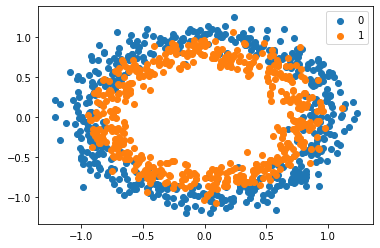

In [1]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

**We can see the noise in the dispersal of the points making the circles less obvious.**

##Multilayer Perceptron Model
**We can develop a Multilayer Perceptron model, or MLP, as a baseline for this problem.**

**First, we will split the 1,000 generated samples into a train and test dataset, with 500 examples in each. This will provide a sufficiently large sample for the model to learn from and an equally sized (fair) evaluation of its performance.**



```
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
```
**We will define a simple MLP model. The network must have two inputs in the visible layer for the two variables in the dataset.**

**The model will have a single hidden layer with 50 nodes, chosen arbitrarily, and use the rectified linear activation function (ReLU) and the He random weight initialization method. The output layer will be a single node with the sigmoid activation function, capable of predicting a 0 for the outer circle and a 1 for the inner circle of the problem.**

**The model will be trained using stochastic gradient descent with a modest learning rate of 0.01 and a large momentum of 0.9, and the optimization will be directed using the binary cross entropy loss function.**




```
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
```

**Once defined, the model can be fit on the training dataset.**

**We will use the holdout test dataset as a validation dataset and evaluate its performance at the end of each training epoch. The model will be fit for 100 epochs, chosen after a little trial and error.**





```
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
```

**At the end of the run, the model is evaluated on the train and test dataset and the accuracy is reported.**




```
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
```

**Finally, line plots are created showing model accuracy on the train and test sets at the end of each training epoch providing learning curves.**

**This plot of learning curves is useful as it gives an idea of how quickly and how well the model has learned the problem.**



```
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
```





Train: 0.834, Test: 0.838


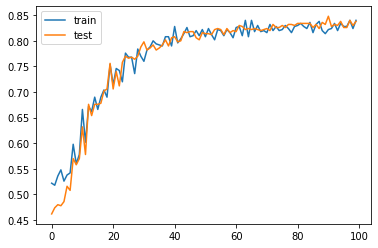

In [3]:
# mlp for the two circles problem
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

**Running the example fits the model and evaluates it on the train and test sets.**

**Your specific results may vary given the stochastic nature of the learning algorithm. Consider re-running the example a number of times.**

**In this case, we can see that the model achieved an accuracy of about 84% on the holdout dataset and achieved comparable performance on both the train and test sets, given the same size and similar composition of both datasets.**

**A graph is created showing line plots of the classification accuracy on the train (blue) and test (orange) datasets.**

**The plot shows comparable performance of the model on both datasets during the training process. We can see that performance leaps up over the first 30-to-40 epochs to above 80% accuracy then is slowly refined.**

##MLP With Batch Normalization
**The model introduced in the previous section can be updated to add batch normalization.**

**The expectation is that the addition of batch normalization would accelerate the training process, offering similar or better classification accuracy of the model in fewer training epochs. Batch normalization is also reported as providing a modest form of regularization, meaning that it may also offer a small reduction in generalization error demonstrated by a small increase in classification accuracy on the holdout test dataset.**

**A new BatchNormalization layer can be added to the model after the hidden layer before the output layer. Specifically, after the activation function of the prior hidden layer.**

Train: 0.836, Test: 0.830


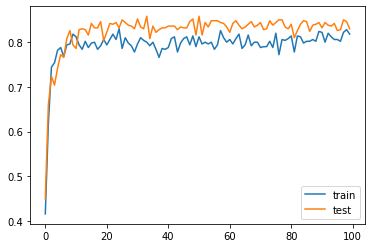

In [5]:
# mlp for the two circles problem with batchnorm after activation function
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

**In this case, we can see that the model has learned the problem faster than the model in the previous section without batch normalization.**
**Specifically, we can see that classification accuracy on the train and test datasets leaps above 80% within the first 20 epochs, as opposed to 30-to-40 epochs in the model without batch normalization.**

**The plot also shows the effect of batch normalization during training. We can see lower performance on the training dataset than the test dataset: scores on the training dataset that are lower than the performance of the model at the end of the training run. This is likely the effect of the input collected and updated each mini-batch.**